<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing-Continuous-Data" data-toc-modified-id="Preprocessing-Continuous-Data-1">Preprocessing Continuous Data</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-2">Learning Outcomes</a></span></li><li><span><a href="#Binning,-aka-Quantization" data-toc-modified-id="Binning,-aka-Quantization-3">Binning, aka Quantization</a></span></li><li><span><a href="#Why-would-you-purposely-lose-information-by-downsampling-your-data?" data-toc-modified-id="Why-would-you-purposely-lose-information-by-downsampling-your-data?-4">Why would you purposely lose information by downsampling your data?</a></span></li><li><span><a href="#What-is-Normalization?" data-toc-modified-id="What-is-Normalization?-5">What is Normalization?</a></span></li><li><span><a href="#Common-Normalization-Techniques" data-toc-modified-id="Common-Normalization-Techniques-6">Common Normalization Techniques</a></span></li><li><span><a href="#Scaling,-aka-min-max-scaling" data-toc-modified-id="Scaling,-aka-min-max-scaling-7">Scaling, aka min-max scaling</a></span></li><li><span><a href="#When-to-and-when-not-to-scale" data-toc-modified-id="When-to-and-when-not-to-scale-8">When to and when not to scale</a></span></li><li><span><a href="#Standardization,-aka-Variance-Scaling" data-toc-modified-id="Standardization,-aka-Variance-Scaling-9">Standardization, aka Variance Scaling</a></span></li><li><span><a href="#Standardization-does-NOT-change-the-type-of-distribution." data-toc-modified-id="Standardization-does-NOT-change-the-type-of-distribution.-10">Standardization does NOT change the type of distribution.</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-11">Check for understanding</a></span></li><li><span><a href="#preprocessing.Normalizer" data-toc-modified-id="preprocessing.Normalizer-12">preprocessing.Normalizer</a></span></li><li><span><a href="#Log-Transformation" data-toc-modified-id="Log-Transformation-13">Log Transformation</a></span></li><li><span><a href="#Transforming-a-Feature-to-be-Normally-Distributed" data-toc-modified-id="Transforming-a-Feature-to-be-Normally-Distributed-14">Transforming a Feature to be Normally Distributed</a></span></li><li><span><a href="#Quantile-Transformation-Steps" data-toc-modified-id="Quantile-Transformation-Steps-15">Quantile Transformation Steps</a></span></li><li><span><a href="#&quot;Target&quot;-Engineering" data-toc-modified-id="&quot;Target&quot;-Engineering-16">"Target" Engineering</a></span></li><li><span><a href="#Steps-for-Target-Transformation" data-toc-modified-id="Steps-for-Target-Transformation-17">Steps for Target Transformation</a></span></li><li><span><a href="#-TransformedTargetRegressor-goes-into-pipelines-(of-course)" data-toc-modified-id="-TransformedTargetRegressor-goes-into-pipelines-(of-course)-18"> TransformedTargetRegressor goes into pipelines (of course)</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-19">Takeaways</a></span></li><li><span><a href="#Bonus-Material" data-toc-modified-id="Bonus-Material-20">Bonus Material</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-21">Check for understanding</a></span></li><li><span><a href="#2-Types-of-Transformations" data-toc-modified-id="2-Types-of-Transformations-22">2 Types of Transformations</a></span></li><li><span><a href="#Linear-Transformations" data-toc-modified-id="Linear-Transformations-23">Linear Transformations</a></span></li><li><span><a href="#Nonlinear-Transformations" data-toc-modified-id="Nonlinear-Transformations-24">Nonlinear Transformations</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-25">Check for understanding</a></span></li></ul></div>

<center><h2>Preprocessing Continuous Data</h2></center>
<br>
<br>
<center><img src="../images/1_2T5rbjOBGVFdSvtlhCqlNg.png" width="100%"/></center>

<center><h2>Learning Outcomes</h2></center>

__By the end of this session, you should be able to__:

- Identify common issues with continuous data.
- List the common methods of preprocessing continuous data.
- Compare and contrast the common methods of preprocessing continuous data.

<center><h2>Binning, aka Quantization</h2></center> 
<br>
<center><img src="../images/bins.png" width="70%"/></center>

Discretize continuous values into a smaller number of "bins".

The result is converting interval data to ordinal categories.

Learn more: https://blog.dominodatalab.com/feature-engineering-framework-techniques/

<center><h2>Why would you purposely lose information by downsampling your data?</h2></center>

1) Helps your goal (e.g., categorize people's age by decade for marketing).

2) Improve signal-to-noise ratio (e.g., aggregate GPS data).

Fitting a model to bins reduces the impact that small fluctuates in the data has on the model, often small fluctuates are just noise. Each bin "smooths" out the fluctuates/noises in sections of the data.

Source: https://datascience.stackexchange.com/questions/19782/what-is-the-rationale-for-discretization-of-continuous-features-and-when-should/23860#23860

In [2]:
reset -fs

In [3]:
import numpy as np

In [4]:
from sklearn.preprocessing import KBinsDiscretizer

# KBinsDiscretizer?

In [32]:
# Generate data evenly space continuous data
data = np.linspace(start=0, stop=10, num=5)
print(*data, sep="\n")

0.0
2.5
5.0
7.5
10.0


In [6]:
# Bin it
est = KBinsDiscretizer(n_bins=3)
data_scaled = est.fit_transform(data.reshape(-1, 1))
# Look that the one-hot encoded categories
print(data_scaled.toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


<center><h2>What is Normalization?</h2></center>

"Normalization" is process that makes something more regular.

Features are often orders of magnitude different from each other. Normalization transforms features to be on a similar scale.

"Normalization" means different things to different people so I prefer to use a more precise language. 

I have people do the the wrong transformation on a project because someone use the word "Normalization".

<center><h2>Common Normalization Techniques</h2></center>

- Rescale
- Standardization
- Transform
    - Log transform is a common example
    - Complex transformation to make sure your data is normally distribution

Source: https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm

<center><h2>Scaling, aka min-max scaling</h2></center>
<br>
<center><img src="../images/min_max.png" width="65%"/></center>

Rescales the values into a new range, typically [0,1].  

In [7]:
reset -fs

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [9]:
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)

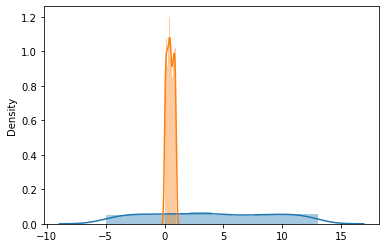

In [10]:
# Let's try it with uniform data
data = np.random.uniform(low=-5, high=13, size=1_000)
sns.distplot(data);

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

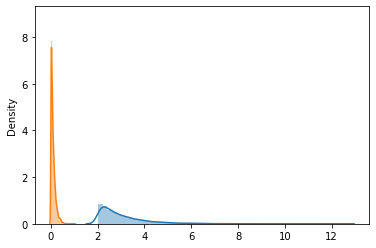

In [11]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)+2
sns.distplot(data);

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

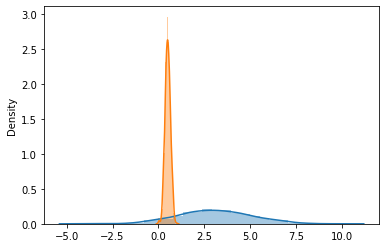

In [12]:
# Let's try it with normal data
data = np.random.normal(loc=3.0, scale=2, size=1_000)
sns.distplot(data);

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

<center><h2>When to and when not to scale</h2></center>

Scaling to a range is a good choice when both of the following conditions are met:

1. You know the approximate upper and lower bounds on your data with few or no outliers.
2. Your data is approximately uniformly distributed across that range.

A good example is age. Most age values falls between 0 and 90, and every part of the range has a substantial number of people.

In contrast, you would not use scaling on income, because only a few people have very high incomes. The upper bound of the linear scale for income would be very high, and most people would be squeezed into a small part of the scale.


MinMaxScaler often greatly compresses the data. Thus, extreme values lose their "extremeness".

[Source](https://developers.google.com/machine-learning/data-prep/transform/normalization)

<center><h2>Standardization, aka Variance Scaling</h2></center>

Rescales data to have a mean ($\mu$) of 0 and standard deviation ($\sigma$) of 1 (unit variance).

$$ \widetilde{x} = \frac{x - x_{mean}}{x_{\sigma}} $$        



Source: https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

In [13]:
from sklearn.preprocessing import StandardScaler

# help(StandardScaler)

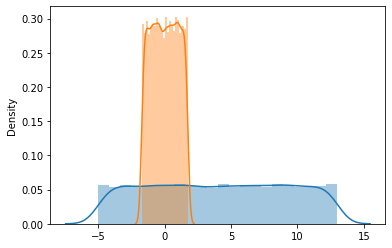

In [14]:
# Let's try it with uniform data
data = np.random.uniform(low=-5, high=13, size=10_000)
sns.distplot(data);

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

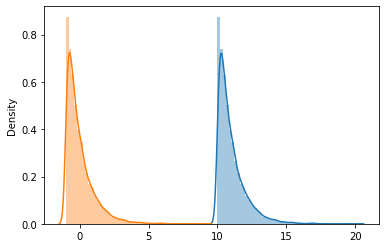

In [15]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)+10
sns.distplot(data);

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

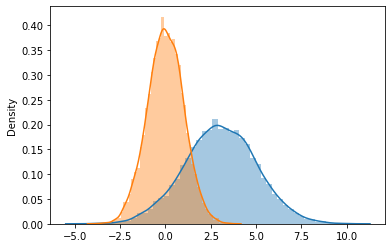

In [16]:
# Let's try it with normal data
data = np.random.normal(loc=3.0, scale=2, size=10_000)
sns.distplot(data);

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

<center><h2>Standardization does NOT change the type of distribution.</h2></center>

In other words, the distribution will stay in the same family (but with different parameters).

<center><h2>Check for understanding</h2></center>

Why is rescaling useful?

Creates a better shaped loss function for gradient decent and regularization.

Learn more [here](https://jermwatt.github.io/machine_learning_refined/notes/9_Feature_engineer_select/9_3_Scaling.html) and [here](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)

Why is rescaling not useful?


1. When units on your features are meaningful. Distance makes a difference, for example k-NN.

2. It increases the sparse of your data. More values will be zero. 

3. Just another step. Adding steps makes the process more complex and slower.

Learn more [here](https://stats.stackexchange.com/questions/189652/is-it-a-good-practice-to-always-scale-normalize-data-for-machine-learning)

<center><h2>preprocessing.Normalizer</h2></center>

[sklearn.preprocessing.Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

Normalize samples features individually to unit norm. 

Mostly useful for controlling the size of a vector in an iterative process, e.g. a parameter vector during training, to avoid numerical instabilities due to large values.

Most common use case is text classification or clustering.

<center><h2>Log Transformation</h2></center>

$$ \widetilde{x} = log(x) $$  

Expands the range of small numbers.   
Compresses the range of large numbers.


Useful when the data follows a power law distribution.

Source:  https://developers.google.com/machine-learning/data-prep/transform/normalization

In [17]:
from sklearn.preprocessing import FunctionTransformer

# help(FunctionTransformer)

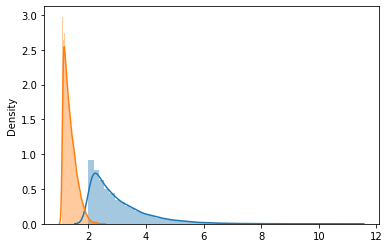

In [18]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)+2
sns.distplot(data);


transformer = FunctionTransformer(np.log1p, validate=False)
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

<center><h2>Transforming a Feature to be Normally Distributed</h2></center>

There are many, many techniques to force a empirical distribution to be normally distributed.
 
__Quantile Transformation__ is your true friend, a type of rank-based inverse normal transformation.

Fit a separate model for each quantile that transforms that section of data to be either be normal (or uniform).

Quantile Transformation is a non-linear transformation.

<center><h2>Quantile Transformation Steps</h2></center>

1) Calculate empirical quantiles.

2) Map the original values to a uniform distribution by estimating a transformation of the cumulative distribution function (CDF).

<center><img src="../images/uniform.png" width="75%"/></center>

3) Those values are then mapped to the desired output distribution (typically normal) by translating and then inverting the CDF. 

Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. 

Sources:
    
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html
- https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/preprocessing/data.py#L2078
- https://stats.stackexchange.com/questions/325570/quantile-transformation-with-gaussian-distribution-sklearn-implementation
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2921808/

In [19]:
from sklearn.preprocessing import QuantileTransformer

# help(QuantileTransformer)

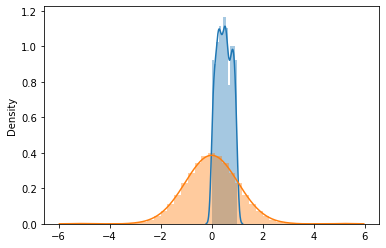

In [20]:
# Let's try it with uniform data
data = np.random.uniform(low=0, high=1, size=1_000)
sns.distplot(data);

transformer = QuantileTransformer(output_distribution='normal')
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

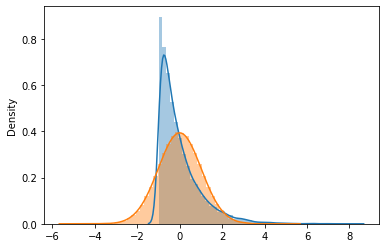

In [21]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)-1
sns.distplot(data);

transformer = QuantileTransformer(output_distribution='normal')
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

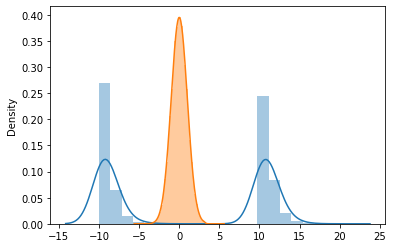

In [22]:
# Let's try it with bimodal exponential data
data_1 = np.random.exponential(scale=1, size=10_000)-10
data_2 = np.random.exponential(scale=1, size=10_000)+10
data = np.concatenate([data_1, data_2])
sns.distplot(data);

transformer = QuantileTransformer(output_distribution='normal')
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

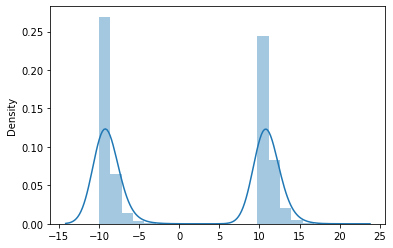

In [23]:
# Long journey back
# trans.inverse_transform?
sns.distplot(transformer.inverse_transform(data_scaled));

<center><h2>"Target" Engineering</h2></center>

Thus far, we have been covering __feature__ engineering. 

We might want to transform targets. For example, regression uses numeric targets.

In [24]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=379)
regressor = LinearRegression()

In [27]:
from sklearn.compose import TransformedTargetRegressor

# help(TransformedTargetRegressor)

In [28]:
# Define it
transformed_target_regr = TransformedTargetRegressor(regressor=regressor,
                                                     transformer=transformer)

In [29]:
# Compare performance to see if transformation helps
from sklearn.metrics import mean_squared_error
print(f"{'MSE':>23}")

raw_target_regr = LinearRegression().fit(X_train, y_train)
mse_raw = mean_squared_error(y_test, raw_target_regr.predict(X_test))
print(f"Raw predict {mse_raw:>12.2f}")

transformed_target_regr.fit(X_train, y_train) 
mse_transformed = mean_squared_error(y_test, transformed_target_regr.predict(X_test))
print(f"Transformed fit {mse_transformed:>8.2f}")

# Peformance went up because we better matching the assumptions of linear regression. 

                    MSE
Raw predict        29.78
Transformed fit    27.12


Source: https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression

<center><h2>Steps for Target Transformation</h2></center>

1. Gather targets.
1. Visually inspect targets.
1. Decide that the targets should be transformed.
1. Let QuantileTransformer learn the transformation. 
1. Let TransformedTargetRegressor learn and predict the targets.

No need to manually keep track of scaled data.

`TransformedTargetRegressor.predict()` will return values in original scale.


It automatically calls `transformer.inverse_func(regressor.predict(X))`   
Source: https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html

<center><h2> TransformedTargetRegressor goes into pipelines (of course)</h2></center>

In [30]:
from sklearn.pipeline import Pipeline 

pipe = Pipeline([('scaler',     StandardScaler()), 
                 ('regressor',  TransformedTargetRegressor(regressor=regressor, transformer=transformer))])

pipe.fit(X_train, y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=QuantileTransformer(n_quantiles=379,
                                                                            output_distribution='normal')))])

<center><h2>Takeaways</h2></center>

- Binning takes a numerical variable and converts to a ordinal variable.
- Normalization is a collection of techniques that transforms data to be on the same scale.
- Scaling is mapping the data from original range to a new range.
- Quantile transformation is the most effective method transform a dataset to be normally distributed.

<br>
<br> 
<br>

----

Bonus Material
-----

[More examples of how scaling changes features](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

<center><h2>Check for understanding</h2></center>

Do we re-fit preprocessing for test data?

No - Preprocessing fit step only applies to the training data. Those functions (and associated parameters) are then applied to the test set.

Re-fit preprocessing for test data is a type of data leakage. 

Think of the specific example of getting a single test record and trying to standardize it. What is the standard deviation of a single data point?

Repeat after me - __YOU NEVER SEE THE TEST DATA__

(It is artifact of what I call "academic" machine learning that the test is even possibly available.)

<center><h2>2 Types of Transformations</h2></center>

<center><img src="../images/lin_nonlin.jpg" width="55%"/></center>
<center><img src="../images/linear transformation.png" width="75%"/></center>

1. Linear functions - preserves linear relationships between variables.
2. Nonlinear functions - changes the linear relationships between variables.

Image Source: https://www.researchgate.net/publication/276464597_New_techniques_for_motion-artifact-free_in_vivo_cardiac_microscopy/figures?lo=1

- Linear preserves the operations of addition and scalar multiplication
- Nonlinear does __NOT__ preserves the operations of addition and scalar multiplication 

Learn more: https://en.wikipedia.org/wiki/Linear_map

<center><h2>Linear Transformations</h2></center>

<center><img src="../images/linear.png" width="75%"/></center>

Each data value is added or multiplied by the same constant.  
Examples:  Translation, rescaling, rotation, or standardization.

<center><h2>Nonlinear Transformations</h2></center>

<center><img src="../images/kernel_trick1.png" width="25%"/></center>
<center><img src="../images/kernel_trick2.png" width="25%"/></center>

Each data value is added or multiplied by a different value (e.g., squaring each value).  
Examples: Most kernels

<center><h2>Check for understanding</h2></center>

On your own:

Which specific machine learning algorithms are sensitive to feature scaling? What is common among them?

Which specific machine learning algorithms are __not__ sensitive to feature scaling? What is common among them?

K-nearest neighbors algorithm (k-NN) and support vector machines (SVM) are sensitive to feature scaling because k-NN use across-dimension distances and SVM learns a hyperplane.

Naive Bayes and tree-based models are __not__ sensitive to feature scaling learn because they learn features independently.

For linear regression it depends … 

For OLS and unregularized regression, rescaling is optional. Rescaling is required for gradient descent because each step is calculated relative to each dimension. Rescaling is required for regularized models because we directly comparing coefficient sizes.

<br>
<br> 
<br>

----